### Importing Data

In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/niharikarawat/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Visualization

Text(0.5, 1.0, 'Customer Churn Prediction Visualization - Tenure')

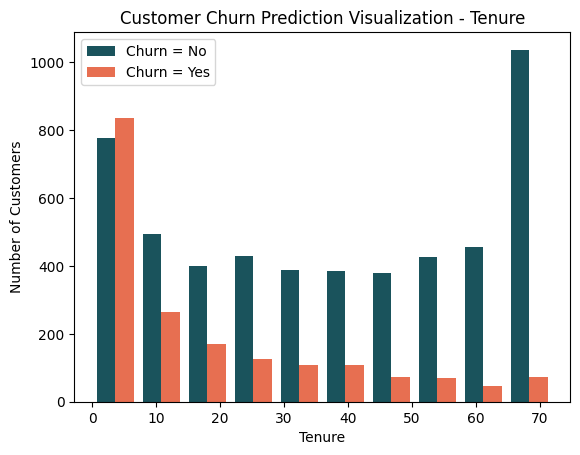

In [367]:
tenure_churn_no = df[df.Churn == 'No'].tenure
tenure_churn_yes = df[df.Churn == 'Yes'].tenure

plt.hist([tenure_churn_no, tenure_churn_yes], color=['#1a535c', "#e76f51"], label=['Churn = No', 'Churn = Yes'])
plt.legend()
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization - Tenure')

Text(0.5, 1.0, 'Customer Churn Prediction Visualization - Monthly Charges')

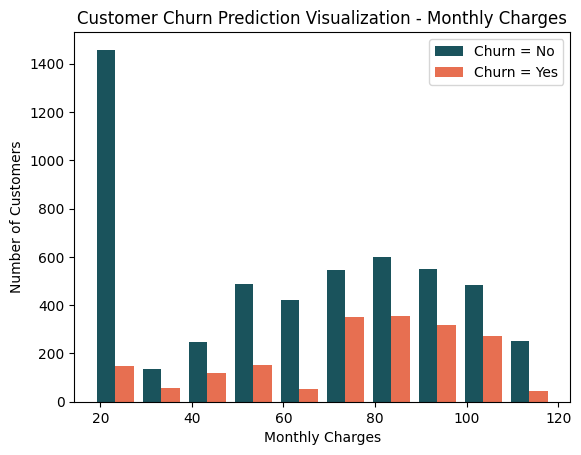

In [368]:
mc_churn_no = df[df.Churn == 'No'].MonthlyCharges
mc_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges

plt.hist([mc_churn_no, mc_churn_yes], color=['#1a535c', "#e76f51"], label=['Churn = No', 'Churn = Yes'])
plt.legend()
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization - Monthly Charges')

### Data Preprocessing

In [369]:
# Dropping customerID column as it is not useful for model training
df.drop('customerID', axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [370]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [371]:
# Converting column 'TotalCharges' to numeric as it should be numeric but is object (string) right now.
df.TotalCharges = pd.to_numeric(df.TotalCharges, downcast='float', errors='coerce')
print('TotalCharges now has numeric values instead of strings:', df.TotalCharges.values)

TotalCharges now has numeric values instead of strings: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]


In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [373]:
# Dropping rows with missing values in TotalCharges column
df = df.dropna(axis=0)
print('Missing values in TotalCharges now:', df.TotalCharges.isnull().sum())

Missing values in TotalCharges now: 0


In [374]:
# Unique values in each column
for col in df:
    print(col, ':', df[col].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [375]:
df.replace('No phone service', 'No', inplace=True)
df.replace('No internet service', 'No', inplace=True)

In [376]:
# Converting all yes/no columns to 1/0 as machine learning models prefer numerical values
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_cols:
    df.replace({'Yes': 1, 'No': 0}, inplace=True)

/var/folders/dh/4lpv9vx574qdj9t36bcg30gw0000gn/T/ipykernel_79789/3238291705.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Yes': 1, 'No': 0}, inplace=True)


In [377]:
# Converting categorical columns to dummy variables
df = pd.get_dummies(data=df, columns=['gender', 'InternetService', 'Contract', 'PaymentMethod'], dtype='int')

In [378]:
for col in df:
    print(col, ':', df[col].unique())

SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
gender_Female : [1 0]
gender_Male : [0 1]
InternetService_0 : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed c

In [379]:
print(df.dtypes)

SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float32
Churn                                        int64
gender_Female                                int64
gender_Male                                  int64
InternetService_0                            int64
InternetService_DSL            

In [380]:
# Scaling numerical columns to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0.000000,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0.464789,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0.014085,1,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0.619718,0,0,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0.014085,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


### Model Training

In [381]:
# Splitting data
from sklearn.model_selection import train_test_split

x = df.drop('Churn', axis=1)
y = df.Churn

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [382]:
# Training model
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([

keras.layers.Dense(20, input_shape=(27,), activation = 'relu'),
keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

/opt/anaconda3/envs/nlpvenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7179 - loss: 0.5393
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7810 - loss: 0.4402  
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.7950 - loss: 0.4259
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.7968 - loss: 0.4220
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.7984 - loss: 0.4193
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.8014 - loss: 0.4179
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.8023 - loss: 0.4160
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.8046 - loss: 0.4151
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - accuracy: 0.8052 - loss: 0.4138
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.8082 - loss: 0.4132
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.8087 - loss: 0.4124
Epoch 12/100
176/176 

### Model Evaluation

In [383]:
# This shows loss and accuracy on the test data
model.evaluate(x_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7790 - loss: 0.4556


[0.4555814266204834, 0.7789623141288757]

In [384]:
# Predicting on test data
yp = model.predict(x_test)
yp[:15]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.00575847],
       [0.09706067],
       [0.6161125 ],
       [0.02691895],
       [0.42314464],
       [0.41662586],
       [0.1192296 ],
       [0.5952952 ],
       [0.07677684],
       [0.01510913],
       [0.61252034],
       [0.27212456],
       [0.00702582],
       [0.12462816],
       [0.06412349]], dtype=float32)

In [385]:
# Converting predictions to binary values
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [386]:
y_test[:15]

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
2173    0
1291    1
2579    0
6578    0
2515    0
Name: Churn, dtype: int64

In [387]:
# Classification report
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.60      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



Text(95.72222222222221, 0.5, 'Actual')

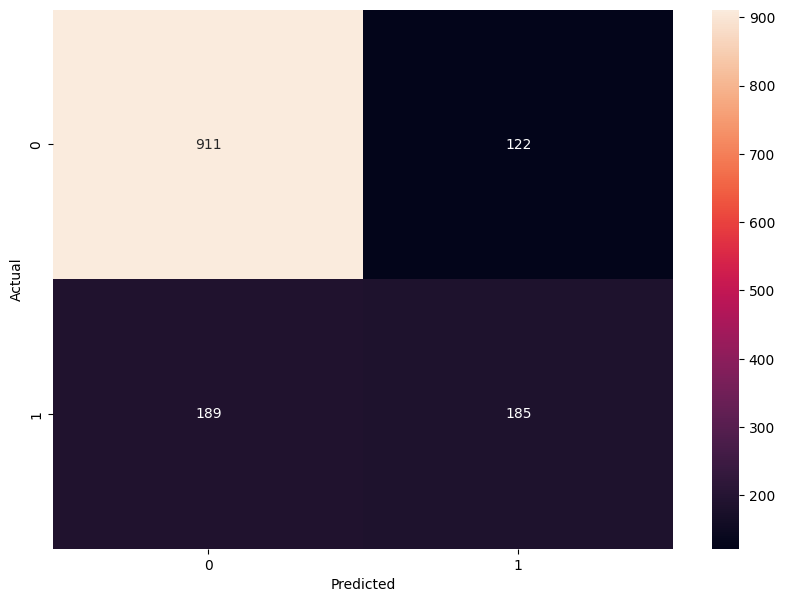

In [388]:
# Confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
